In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import mplhep as hep
import h5py
import numpy as np
import awkward1 as ak
import pandas as pd
import mplhep as hep
import seaborn as sns

In [2]:
PATH = "/eos/home-m/matheus/output_AQAg/" # Caminho comum para todos os arquivos .h5

# Função que abre os arquivos .h5

In [3]:
def open_file( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        #print ( list(f.keys()) )
        dset = f['dados']
        #print ( dset.shape )
        #print ( dset[:,:] )
        dset_columns = f['columns']
        #print ( dset_columns.shape )
        columns_ = list( dset_columns )
        #print ( columns_ )
        columns_str = [ item.decode("utf-8") for item in columns_ ]
        #print ( columns_str )
        df = pd.DataFrame( dset, columns = columns_str )
        array = np.array( dset )
        #print ( df )    
        return array
        #return df

# Luminosidade Integrada

In [4]:
SingleMuon_Run2016B = 4.55
SingleMuon_Run2016C = 1.59
SingleMuon_Run2016G = 3.65
Luminosidade        = SingleMuon_Run2016B + SingleMuon_Run2016C + SingleMuon_Run2016G 

# Amostras de Signal

* ## Normalização 

Seção de Choque

In [5]:
cross_section_SM       = 40.41*0.17
cross_section_ANOMALO1 = 166.1*0.17 
cross_section_ANOMALO2 = 41.90*0.17
cross_section_ANOMALO3 = 48.75*0.17
cross_section_ANOMALO4 = 61.14*0.17
cross_section_ANOMALO5 = 41.58*0.17
cross_section_ANOMALO6 = 44.93*0.17
cross_section_ANOMALO7 = 58.18*0.17 
cross_section_ANOMALO8 = 150.3*0.17

Número de Eventos 

In [6]:
number_events_SM       = 35000
number_events_ANOMALO1 = 35000
number_events_ANOMALO2 = 35000
number_events_ANOMALO3 = 35000
number_events_ANOMALO4 = 35000
number_events_ANOMALO5 = 35000
number_events_ANOMALO6 = 35000
number_events_ANOMALO7 = 35000
number_events_ANOMALO8 = 35000

Normalizacao dos eventos de SIGNAL

In [7]:
norm_SM = ( cross_section_SM * Luminosidade ) / ( number_events_SM )
norm_ANOMALO1 = ( cross_section_ANOMALO1 * Luminosidade ) / ( number_events_ANOMALO1 )
norm_ANOMALO2 = ( cross_section_ANOMALO2 * Luminosidade ) / ( number_events_ANOMALO2 )
norm_ANOMALO3 = ( cross_section_ANOMALO3 * Luminosidade ) / ( number_events_ANOMALO3 )
norm_ANOMALO4 = ( cross_section_ANOMALO4 * Luminosidade ) / ( number_events_ANOMALO4 )
norm_ANOMALO5 = ( cross_section_ANOMALO5 * Luminosidade ) / ( number_events_ANOMALO5 )
norm_ANOMALO6 = ( cross_section_ANOMALO6 * Luminosidade ) / ( number_events_ANOMALO6 )
norm_ANOMALO7 = ( cross_section_ANOMALO7 * Luminosidade ) / ( number_events_ANOMALO7 )
norm_ANOMALO8 = ( cross_section_ANOMALO8 * Luminosidade ) / ( number_events_ANOMALO8 )

* ## Importando as amostras de Signal

In [8]:
SM = PATH + 'output-SM.h5'
ANOMALO1 = PATH + 'output-ANOMALO1.h5'
ANOMALO2 = PATH + 'output-ANOMALO2.h5'
ANOMALO3 = PATH + 'output-ANOMALO3.h5'
ANOMALO4 = PATH + 'output-ANOMALO4.h5'
ANOMALO5 = PATH + 'output-ANOMALO5.h5'
ANOMALO6 = PATH + 'output-ANOMALO6.h5'
ANOMALO7 = PATH + 'output-ANOMALO7.h5'
ANOMALO8 = PATH + 'output-ANOMALO8.h5'

In [9]:
SM =       open_file(SM)
ANOMALO1 = open_file(ANOMALO1)
ANOMALO2 = open_file(ANOMALO2)
ANOMALO3 = open_file(ANOMALO3)
ANOMALO4 = open_file(ANOMALO4)
ANOMALO5 = open_file(ANOMALO5)
ANOMALO6 = open_file(ANOMALO6)
ANOMALO7 = open_file(ANOMALO7)
ANOMALO8 = open_file(ANOMALO8)

## Concatenando os pesos no array dos eventos 

In [10]:
weight_SM = np.array( [ norm_SM ]*len( SM ) ).reshape(-1,1)
SM = np.concatenate( ( SM , weight_SM ) , axis = 1 )

weight_ANOMALO1 = np.array( [ norm_ANOMALO1 ]*len( ANOMALO1 ) ).reshape(-1,1)
ANOMALO1 = np.concatenate( ( ANOMALO1 , weight_ANOMALO1 ) , axis = 1 )

weight_ANOMALO2 = np.array( [ norm_ANOMALO2 ]*len( ANOMALO2 ) ).reshape(-1,1)
ANOMALO2 = np.concatenate( ( ANOMALO2 , weight_ANOMALO2 ) , axis = 1 )

weight_ANOMALO3 = np.array( [ norm_ANOMALO3 ]*len( ANOMALO3 ) ).reshape(-1,1)
ANOMALO3 = np.concatenate( ( ANOMALO3 , weight_ANOMALO3 ) , axis = 1 )

weight_ANOMALO4 = np.array( [ norm_ANOMALO4 ]*len( ANOMALO4 ) ).reshape(-1,1)
ANOMALO4 = np.concatenate( ( ANOMALO4 , weight_ANOMALO4 ) , axis = 1 )

weight_ANOMALO5 = np.array( [ norm_ANOMALO5 ]*len( ANOMALO5 ) ).reshape(-1,1)
ANOMALO5 = np.concatenate( ( ANOMALO5 , weight_ANOMALO5 ) , axis = 1 )

weight_ANOMALO6 = np.array( [ norm_ANOMALO6 ]*len( ANOMALO6 ) ).reshape(-1,1)
ANOMALO6= np.concatenate( ( ANOMALO6, weight_ANOMALO6) , axis = 1 )

weight_ANOMALO5 = np.array( [ norm_ANOMALO5 ]*len( ANOMALO5 ) ).reshape(-1,1)
ANOMALO6= np.concatenate( ( ANOMALO6, weight_ANOMALO6) , axis = 1 )

weight_ANOMALO7= np.array( [ norm_ANOMALO7]*len( ANOMALO7) ).reshape(-1,1)
ANOMALO7= np.concatenate( ( ANOMALO7, weight_ANOMALO7) , axis = 1 )

weight_ANOMALO8= np.array( [ norm_ANOMALO8]*len( ANOMALO8) ).reshape(-1,1)
ANOMALO8= np.concatenate( ( ANOMALO8, weight_ANOMALO8) , axis = 1 )

# Amostras de Background

* ## Normalização 

Seção de Choque

In [11]:
cross_section_TT = 831.7
cross_section_inclusive_WZ = 10.73
cross_section_inclusive_WW = 49.997
cross_section_inclusive_ZZ = 3.28
cross_section_ST_s_channel = 3.365
cross_section_ST_t_channel_top = 136.02
cross_section_ST_t_channel_antitop = 80.95
cross_section_ST_tW_top= 35.85
cross_section_ST_tW_antitop = 35.85
cross_section_DYJetsToLL_Pt_100To250 = 83.12
cross_section_DYJetsToLL_Pt_250To400 = 3.047
cross_section_DYJetsToLL_Pt_400To650 = 0.3921
cross_section_DYJetsToLL_Pt_650ToInf = 0.0363
cross_section_QCD_Pt_170to300 = 8654
cross_section_QCD_Pt_300to470 = 797.3
cross_section_QCD_Pt_470to600 = 79.0
cross_section_QCD_Pt_600to800 = 25.09
cross_section_QCD_Pt_800to1000 = 4.7
cross_section_QCD_Pt_1000toInf = 1.6
cross_section_WJetsToLNu_Pt_100To250 = 677.82
cross_section_WJetsToLNu_Pt_250To400 = 24.083
cross_section_WJetsToLNu_Pt_400To600 = 3.0563
cross_section_WJetsToLNu_Pt_600ToInf = 0.4602

Número de Eventos

In [12]:
number_events_TT = 76915549
number_events_inclusive_WZ = 24311445
number_events_inclusive_WW = 6655400 + 1999200
number_events_inclusive_ZZ = 15061141 + 755866
number_events_ST_s_channel = 1000000
number_events_ST_t_channel_top = 43864048
number_events_ST_t_channel_antitop = 38811017
number_events_ST_tW_top = 6952830
number_events_ST_tW_antitop = 6933094
number_events_DYJetsToLL_Pt_100To250 =  2991815 + 2805972 + 2046961
number_events_DYJetsToLL_Pt_250To400 = 47559302 + 594317 + 590806 + 423976
number_events_DYJetsToLL_Pt_400To650 = 604038 + 589842 + 432056
number_events_DYJetsToLL_Pt_650ToInf = 597526 + 430691
number_events_QCD_Pt_170to300 = 19789673 + 7947159
number_events_QCD_Pt_300to470 = 24605508 + 16462878 + 7937590
number_events_QCD_Pt_470to600 = 9847664 + 5668793 + 3972819
number_events_QCD_Pt_600to800 = 9928218 + 5971175 + 401013
number_events_QCD_Pt_800to1000 = 9966149 + 6011849 + 3962749
number_events_QCD_Pt_1000toInf = 9638102 + 3990117
number_events_WJetsToLNu_Pt_100To250 = 10088599 + 9944879
number_events_WJetsToLNu_Pt_250To400 = 10021205 + 1001250 + 1000132
number_events_WJetsToLNu_Pt_400To600 = 988234 + 951713
number_events_WJetsToLNu_Pt_600ToInf = 985127 + 989482

Normalizacao dos eventos de BACKGROUND 

In [13]:
norm_TT = ( cross_section_TT*1000 * Luminosidade ) / number_events_TT
norm_inclusive_WZ = ( cross_section_inclusive_WZ*1000 * Luminosidade ) / number_events_inclusive_WZ
norm_inclusive_ZZ = ( cross_section_inclusive_ZZ*1000 * Luminosidade ) / number_events_inclusive_ZZ
norm_inclusive_WW = ( cross_section_inclusive_WW*1000 * Luminosidade ) / number_events_inclusive_WW
norm_ST_s_channel = ( cross_section_ST_s_channel*1000 * Luminosidade ) / number_events_ST_s_channel
norm_ST_t_channel_top = ( cross_section_ST_t_channel_top*1000 * Luminosidade ) / number_events_ST_t_channel_top
norm_ST_t_channel_antitop = ( cross_section_ST_t_channel_antitop*1000 * Luminosidade) / number_events_ST_t_channel_antitop
norm_ST_tW_antitop = ( cross_section_ST_tW_antitop * Luminosidade*1000 ) / number_events_ST_tW_antitop
norm_ST_tW_top = ( cross_section_ST_tW_top*1000 * Luminosidade) / number_events_ST_tW_top
norm_QCD_Pt_170to300  = ( cross_section_QCD_Pt_170to300*1000  * Luminosidade ) / ( number_events_QCD_Pt_170to300  )
norm_QCD_Pt_300to470  = ( cross_section_QCD_Pt_300to470*1000  * Luminosidade ) / ( number_events_QCD_Pt_300to470  )
norm_QCD_Pt_470to600  = ( cross_section_QCD_Pt_470to600*1000  * Luminosidade ) / ( number_events_QCD_Pt_470to600  )
norm_QCD_Pt_600to800  = ( cross_section_QCD_Pt_600to800*1000  * Luminosidade ) / ( number_events_QCD_Pt_600to800  )
norm_QCD_Pt_800to1000 = ( cross_section_QCD_Pt_800to1000*1000 * Luminosidade ) / ( number_events_QCD_Pt_800to1000 )
norm_QCD_Pt_1000toInf = ( cross_section_QCD_Pt_1000toInf*1000 * Luminosidade ) / ( number_events_QCD_Pt_1000toInf )
norm_DYJetsToLL_Pt_100To250 = ( cross_section_DYJetsToLL_Pt_100To250*1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_100To250 )
norm_DYJetsToLL_Pt_250To400 = ( cross_section_DYJetsToLL_Pt_250To400*1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_250To400 )
norm_DYJetsToLL_Pt_400To650 = ( cross_section_DYJetsToLL_Pt_400To650*1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_400To650 )
norm_DYJetsToLL_Pt_650ToInf = ( cross_section_DYJetsToLL_Pt_650ToInf*1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_650ToInf )

# Miguel, fazer a norm do W+jatos

norm_WJetsToLNu_Pt_100To250 = ( cross_section_WJetsToLNu_Pt_100To250*1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_100To250 )
norm_WJetsToLNu_Pt_250To400 = ( cross_section_WJetsToLNu_Pt_250To400*1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_250To400 )
norm_WJetsToLNu_Pt_400To600 = ( cross_section_WJetsToLNu_Pt_400To600*1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_400To600 )
norm_WJetsToLNu_Pt_600ToInf = ( cross_section_WJetsToLNu_Pt_600ToInf*1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_600ToInf )

* ## Importando as amostras de Background

* DRELL YAN

In [14]:
# Pt entre 100 e 250 GeV
DY_100_250_2 = PATH + 'output-DY_100_250_2.h5'
DY_100_250_3 = PATH + 'output-DY_100_250_3.h5'
DY_100_250_4 = PATH + 'output-DY_100_250_4.h5'

DY_100_250 = np.concatenate(  ( open_file( DY_100_250_2 ), 
                                open_file( DY_100_250_3 ), 
                                open_file( DY_100_250_4 ) )  , axis = 0 ) 

weight_DY_100_250 = np.array( [ norm_DYJetsToLL_Pt_100To250 ]*len( DY_100_250 ) ).reshape(-1,1)

DY_100_250 = np.concatenate( ( DY_100_250 , weight_DY_100_250 ) , axis = 1 )

# Miguel, fazer o caso acima para todos os arquivos, tanto back quanto signal

# Pt entre 250 e 400 GeV
DY_250_400_2 = PATH + 'output-DY_250_400_2.h5'
DY_250_400_3 = PATH + 'output-DY_250_400_3.h5'
DY_250_400_4 = PATH + 'output-DY_250_400_4.h5'

DY_250_400 = np.concatenate(  ( open_file( DY_250_400_2 ), 
                                open_file( DY_250_400_3 ), 
                                open_file( DY_250_400_4 ) )  , axis = 0 ) 

weight_DY_250_400 = np.array( [ norm_DYJetsToLL_Pt_250To400 ]*len( DY_250_400 ) ).reshape(-1,1)

DY_250_400 = np.concatenate( ( DY_250_400 , weight_DY_250_400 ) , axis = 1 )

# Pt entre 400 e 650 GeV
DY_400_650_1 = PATH + 'output-DY_400_650_1.h5'
DY_400_650_2 = PATH + 'output-DY_400_650_2.h5'
DY_400_650_3 = PATH + 'output-DY_400_650_3.h5'

DY_400_650 = np.concatenate(  ( open_file( DY_400_650_1 ), 
                                open_file( DY_400_650_2 ), 
                                open_file( DY_400_650_3 ) )  , axis = 0 ) 

weight_DY_400_650 = np.array( [ norm_DYJetsToLL_Pt_400To650 ]*len( DY_400_650 ) ).reshape(-1,1)

DY_400_650 = np.concatenate( ( DY_400_650 , weight_DY_400_650 ) , axis = 1 )

# Pt entre 650 e infinito GeV
DY_650_INF_1 = PATH + 'output-DY_650_INF_1.h5'
DY_650_INF_2 = PATH + 'output-DY_650_INF_2.h5'

DY_650_INF = np.concatenate(  ( open_file( DY_650_INF_1 ), 
                                open_file( DY_650_INF_2 ) )  , axis = 0 ) 

weight_DY_650_INF = np.array( [ norm_DYJetsToLL_Pt_650ToInf ]*len( DY_650_INF ) ).reshape(-1,1)

DY_650_INF = np.concatenate( ( DY_650_INF , weight_DY_650_INF ) , axis = 1 )

In [15]:
# Concatenando todas as constribuições de Pt para o Drell-Yan
Drell_Yan = np.concatenate( ( DY_100_250 , DY_250_400 , DY_400_650 , DY_650_INF ) , axis = 0  ) 

* QCD

In [16]:
# Pt entre 170 e 300 GeV
QCD_170_300_1 = PATH + 'output-QCD_170_300_1.h5'
QCD_170_300_3 = PATH + 'output-QCD_170_300_3.h5'

QCD_170_300 = np.concatenate(  ( open_file( QCD_170_300_1 ), 
                                 open_file( QCD_170_300_3 ) )  , axis = 0 ) 

weight_QCD_170_300 = np.array( [ norm_QCD_Pt_170to300 ]*len( QCD_170_300 ) ).reshape(-1,1)

QCD_170_300 = np.concatenate( ( QCD_170_300 , weight_QCD_170_300 ) , axis = 1 )

# Pt entre 300 e 470 GeV
QCD_300_470_1 = PATH + 'output-QCD_300_470_1.h5'
QCD_300_470_2 = PATH + 'output-QCD_300_470_2.h5'
QCD_300_470_3 = PATH + 'output-QCD_300_470_3.h5'

QCD_300_470 = np.concatenate(  ( open_file( QCD_300_470_1 ), 
                                 open_file( QCD_300_470_2 ),
                                 open_file( QCD_300_470_3 ) )  , axis = 0 ) 

weight_QCD_300_470 = np.array( [ norm_QCD_Pt_300to470 ]*len( QCD_300_470 ) ).reshape(-1,1)

QCD_300_470 = np.concatenate( ( QCD_300_470 , weight_QCD_300_470 ) , axis = 1 )

# Pt entre 470 e 600 GeV
QCD_470_600_1 = PATH + 'output-QCD_470_600_1.h5'
QCD_470_600_2 = PATH + 'output-QCD_470_600_2.h5'
QCD_470_600_3 = PATH + 'output-QCD_470_600_3.h5'

QCD_470_600 = np.concatenate(  ( open_file( QCD_470_600_1 ), 
                                 open_file( QCD_470_600_2 ),
                                 open_file( QCD_470_600_3 ) )  , axis = 0 ) 

weight_QCD_470_600 = np.array( [ norm_QCD_Pt_470to600 ]*len( QCD_470_600 ) ).reshape(-1,1)

QCD_470_600 = np.concatenate( ( QCD_470_600 , weight_QCD_470_600 ) , axis = 1 )

# Pt entre 600 e 800 GeV
QCD_600_800_1 = PATH + 'output-QCD_600_800_1.h5'
QCD_600_800_2 = PATH + 'output-QCD_600_800_2.h5'
QCD_600_800_3 = PATH + 'output-QCD_600_800_3.h5'

QCD_600_800 = np.concatenate(  ( open_file( QCD_600_800_1 ), 
                                 open_file( QCD_600_800_2 ),
                                 open_file( QCD_600_800_3 ) )  , axis = 0 ) 

weight_QCD_600_800 = np.array( [ norm_QCD_Pt_600to800 ]*len( QCD_600_800 ) ).reshape(-1,1)

QCD_600_800 = np.concatenate( ( QCD_600_800 , weight_QCD_600_800 ) , axis = 1 )

# Pt entre 800 e 1000 GeV
QCD_800_1000_1 = PATH + 'output-QCD_800_1000_1.h5'
QCD_800_1000_2 = PATH + 'output-QCD_800_1000_2.h5'
QCD_800_1000_3 = PATH + 'output-QCD_800_1000_3.h5'

QCD_800_1000 = np.concatenate(  ( open_file( QCD_800_1000_1 ), 
                                  open_file( QCD_800_1000_2 ),
                                  open_file( QCD_800_1000_3 ) )  , axis = 0 ) 

weight_QCD_800_1000 = np.array( [ norm_QCD_Pt_800to1000 ]*len( QCD_800_1000 ) ).reshape(-1,1)

QCD_800_1000 = np.concatenate( ( QCD_800_1000 , weight_QCD_800_1000 ) , axis = 1 )

# Pt entre 1000 e infinito GeV
QCD_1000_inf_1 = PATH +'output-QCD_1000_inf_1.h5'
QCD_1000_inf_2 = PATH +'output-QCD_1000_inf_2.h5'

QCD_1000_inf = np.concatenate(  ( open_file( QCD_1000_inf_1 ), 
                                  open_file( QCD_1000_inf_2 ) )  , axis = 0 ) 

weight_QCD_1000_inf = np.array( [ norm_QCD_Pt_1000toInf ]*len( QCD_1000_inf ) ).reshape(-1,1)

QCD_1000_inf = np.concatenate( ( QCD_1000_inf , weight_QCD_1000_inf ) , axis = 1 )

In [17]:
# Concatenando todas as constribuições de Pt para o QCD
QCD = np.concatenate( ( QCD_170_300 , QCD_300_470 , QCD_470_600 , QCD_600_800 , QCD_800_1000 , QCD_1000_inf ) , axis = 0 )

* SINGLE ANTI-TOP

In [18]:
Single_Antitop = PATH + 'output-Single_Antitop.h5'
file_Single_Antitop = open_file(Single_Antitop)

weight_ST_tW_antitop = np.array( [ norm_ST_tW_antitop ]*len( file_Single_Antitop ) ).reshape(-1,1)
Single_Antitop = np.concatenate( ( file_Single_Antitop , weight_ST_tW_antitop ) , axis = 1 )

* SINGLE ANTI-TOP tCHANEL

In [19]:
Single_Antitop_tChannel = PATH + 'output-Single_Antitop_tChannel.h5'
file_Single_Antitop_tChannel = open_file(Single_Antitop_tChannel)

weight_Antitop_tChannel = np.array( [ norm_ST_t_channel_antitop ]*len( file_Single_Antitop_tChannel ) ).reshape(-1,1)
Single_Antitop_tChannel = np.concatenate( ( file_Single_Antitop_tChannel , weight_Antitop_tChannel ) , axis = 1 )

* SINGLE TOP

In [20]:
Single_Top = PATH + 'output-Single_Top.h5'
file_Single_Top = open_file(Single_Top)

weight_Single_Top = np.array( [ norm_ST_tW_top ]*len( file_Single_Top ) ).reshape(-1,1)
Single_Top = np.concatenate( ( file_Single_Top , weight_Single_Top ) , axis = 1 )

* SINGLE TOP sCHANNEL

In [21]:
Single_Top_sChanel = PATH + 'output-Single_Top_sChanel.h5'
file_Single_Top_sChanel = open_file(Single_Top_sChanel)

weight_Single_Top_sChanel = np.array( [ norm_ST_s_channel ]*len( file_Single_Top_sChanel ) ).reshape(-1,1)
Single_Top_sChanel = np.concatenate( ( file_Single_Top_sChanel , weight_Single_Top_sChanel ) , axis = 1 )

* SINGLE TOP tCHANNEL

In [22]:
Single_Top_tChannel = PATH + 'output-Single_Top_tChannel.h5'
file_Single_Top_tChannel = open_file(Single_Top_tChannel)

weight_Single_Top_tChannel = np.array( [ norm_ST_t_channel_top ]*len( file_Single_Top_tChannel ) ).reshape(-1,1)
Single_Top_tChannel = np.concatenate( ( file_Single_Top_tChannel , weight_Single_Top_tChannel ) , axis = 1 )

In [23]:
single_top = np.concatenate( ( Single_Top_tChannel, 
                               Single_Top_sChanel , 
                               Single_Top , 
                               Single_Antitop_tChannel , 
                               Single_Antitop) , axis = 0 )

* TTBAR

In [24]:
TTbar = PATH + 'output-ttbar.h5'
file_TTbar = open_file(TTbar)

weight_Single_Top_sChanel = np.array( [ norm_TT ]*len( file_TTbar ) ).reshape(-1,1)
TTbar = np.concatenate( ( file_TTbar , weight_Single_Top_sChanel ) , axis = 1 )

* W + JETS

In [25]:
# Pt entre 100 e 250 GeV
WJets_100_250_2 = PATH + 'output-WJets_100_250_2.h5'
WJets_100_250_3 = PATH + 'output-WJets_100_250_3.h5'

WJets_100_250 = np.concatenate(  ( open_file( WJets_100_250_2 ), 
                                   open_file( WJets_100_250_3 ) )  , axis = 0 ) 

weight_WJets_100_250 = np.array( [ norm_WJetsToLNu_Pt_100To250 ]*len( WJets_100_250 ) ).reshape(-1,1)

WJets_100_250 = np.concatenate( ( WJets_100_250 , weight_WJets_100_250 ) , axis = 1 )


# Pt entre 250 e 400 GeV 
WJets_250_400_2 = PATH +'output-WJets_250_400_2.h5'
WJets_250_400_3 = PATH + 'output-WJets_250_400_3.h5'

WJets_250_400 = np.concatenate(  ( open_file( WJets_250_400_2 ), 
                                   open_file( WJets_250_400_3 ) )  , axis = 0 ) 

weight_WJets_250_400 = np.array( [ norm_WJetsToLNu_Pt_250To400 ]*len( WJets_250_400 ) ).reshape(-1,1)

WJets_250_400 = np.concatenate( ( WJets_250_400 , weight_WJets_250_400 ) , axis = 1 )

# Pt entre 400 e 600 GeV
WJets_400_600_1 = PATH + 'output-WJets_400_600_1.h5'
WJets_400_600_2 = PATH + 'output-WJets_400_600_2.h5'

WJets_400_600 = np.concatenate(  ( open_file( WJets_400_600_1 ), 
                                   open_file( WJets_400_600_2 ) )  , axis = 0 ) 

weight_WJets_400_600 = np.array( [ norm_WJetsToLNu_Pt_400To600 ]*len( WJets_400_600 ) ).reshape(-1,1)

WJets_400_600 = np.concatenate( ( WJets_400_600 , weight_WJets_400_600 ) , axis = 1 )

# Pt entre 600 e infinito GeV
WJets_600_inf_1 = PATH + 'output-WJets_600_inf_1.h5'
WJets_600_inf_2 = PATH + 'output-WJets_600_inf_2.h5'

WJets_600_inf = np.concatenate(  ( open_file( WJets_600_inf_1 ), 
                                   open_file( WJets_600_inf_2 ) )  , axis = 0 ) 

weight_WJets_600_inf = np.array( [ norm_WJetsToLNu_Pt_600ToInf ]*len( WJets_600_inf ) ).reshape(-1,1)

WJets_600_inf = np.concatenate( ( WJets_600_inf , weight_WJets_600_inf ) , axis = 1 )

In [26]:
# Concatenando todas as constribuições de Pt para o W + Jets
WJets = np.concatenate( ( WJets_100_250 , WJets_250_400 , WJets_400_600 , WJets_600_inf ) , axis = 0 )

* INCLUSIVO WW

In [27]:
WW_1 = PATH + 'output-WW1.h5'
WW_2 = PATH + 'output-WW2.h5'

WW = np.concatenate(  ( open_file( WW_1 ), 
                        open_file( WW_2 ) )  , axis = 0 ) 

weight_WW = np.array( [ norm_inclusive_WW ]*len( WW ) ).reshape(-1,1)
WW = np.concatenate( ( WW , weight_WW ) , axis = 1 )

* INCLUSIVO WZ

In [28]:
WZ = PATH + 'output-WZ.h5'
file_WZ = open_file(WZ)

weight_WZ = np.array( [ norm_inclusive_WZ ]*len( file_WZ ) ).reshape(-1,1)
WZ = np.concatenate( ( file_WZ , weight_WZ ) , axis = 1 )

* INCLUSIVO ZZ

In [29]:
ZZ_1 = PATH + 'output-ZZ1.h5'
ZZ_2 = PATH + 'output-ZZ2.h5'

ZZ = np.concatenate(  ( open_file( ZZ_1 ), 
                        open_file( ZZ_2 ) )  , axis = 0 ) 

weight_ZZ = np.array( [ norm_inclusive_ZZ ]*len( ZZ ) ).reshape(-1,1)
ZZ = np.concatenate( ( ZZ , weight_ZZ ) , axis = 1 )

In [30]:
VV_inclusivo = np.concatenate( ( WW , WZ , ZZ ) , axis = 0 )

# Dados - 2016

In [31]:
Data_B = open_file( PATH + 'output-Data_B.h5')
Data_C = open_file( PATH + 'output-Data_C.h5')
Data_G = open_file( PATH + 'output-Data_G.h5')
Data_H = open_file( PATH + 'output-Data_H.h5')

In [32]:
Dadinhos_reais = np.concatenate( ( Data_B , Data_C ,  Data_G ,  Data_H ) , axis = 0 )

# Histogramas

In [33]:
label_back = [ 'W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan'  , 'Single-Top'   , '(WW, WZ, ZZ) Inclusivo' ]

In [34]:
label_signal_0 = [
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-6}$',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=5 \times 10^{-6}$', 
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$'
          ]

label_signal_1 = [
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.0$ (SM)',  
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6} $',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 1.0 \times 10^{-6} $',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $'
          ]

In [35]:
def plot(lista__back,lista_signal1,lista_signal2,bins0,bins1,label0,label1,xmin,xmax,fontsize_xlabel,lista_norm1,lista_norm2):
    fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
    axes[0].hist( [lista__back,lista_signal1], bins = bins0, stacked=True, histtype = None, label=label0, density = False, weights = lista_norm1, color = ['blue','gold','red','cyan','lime','orange'] )
    axes[0].hist( lista_backgr(0) , bins = 40, range = (0,3000), stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
    axes[0].legend(loc='best', fontsize=fontsize_leg)
    axes[0].set_xlim(xmin,xmax)
    axes[0].set_ylabel('Eventos', fontsize = 18)
    axes[0].set_yscale('log')
    axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0])

    axes[1].hist( [lista__back,lista_signal2], bins = bins1, stacked=True, histtype = None, label=label1, density = False, weights = lista_norm2, color = ['cyan', 'green', 'red', 'fuchsia','gold'] )
    axes[1].legend(loc=loc_leg, fontsize=14)
    axes[1].set_xlim(xmin,xmax)
    axes[1].set_xlabel(xlabel,fontsize = 18)
    axes[1].set_yscale('log')
    axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1])    
    #plt.savefig(PATH_PLOT+'/{}.pdf'.format(name))
    plt.show()

* Numeração das colunas do numpy array

0  --> massa do WW [:,0]

1  --> Pt do W leptônico [:,1]

2  --> DeltaPhi entre W_hadrônico e W_leptônico [:,2]

3  --> DeltaPhi entre Jatos e o MET [:,3]

4  --> jetAK8_pt [:,4]

5  --> jetAK8_eta [:,5]

6  --> jetAK8_prunedMass [:,6]

7  --> jetAK8_tau21 [:,7]
 
8  --> METPt [:,8]

9  --> muon_pt [:,9]

10 --> muon_eta [:,10]

11 --> ExtraTracks [:,11]

12 --> Weight [:,12]

### Como argumento da função, seleciona  o número correspondente para fazer o histograma desejado

In [36]:
def lista_backgr(var):
    return [ WJets[:,var],TTbar[:,var],QCD[:,var],Drell_Yan[:,var],single_top[:,var],VV_inclusivo[:,var] ]

In [37]:
def lista_signal_0(var):
    return [ SM[:,var] , ANOMALO1[:,var] , ANOMALO2[:,var] , ANOMALO3[:,var] , ANOMALO4[:,var] ]

def lista_signal_1(var):
    return [ SM[:,var] , ANOMALO5[:,var] , ANOMALO6[:,var] , ANOMALO7[:,var] , ANOMALO8[:,var] ]

## Lista com as normalizações. Insere ele no 'weights = lista...' dentro do método plt.hist()

In [38]:
lista_norm_back = [ WJets[:,12], TTbar[:,12], QCD[:,12], Drell_Yan[:,12], single_top[:,12], VV_inclusivo[:,12] ]

In [39]:
lista_signal_0_norm = [ SM[:,12] , ANOMALO1[:,12] , ANOMALO2[:,12] , ANOMALO3[:,12] , ANOMALO4[:,12] ]
lista_signal_1_norm = [ SM[:,12] , ANOMALO5[:,12] , ANOMALO6[:,12] , ANOMALO7[:,12] , ANOMALO8[:,12] ]

## Massa do WW

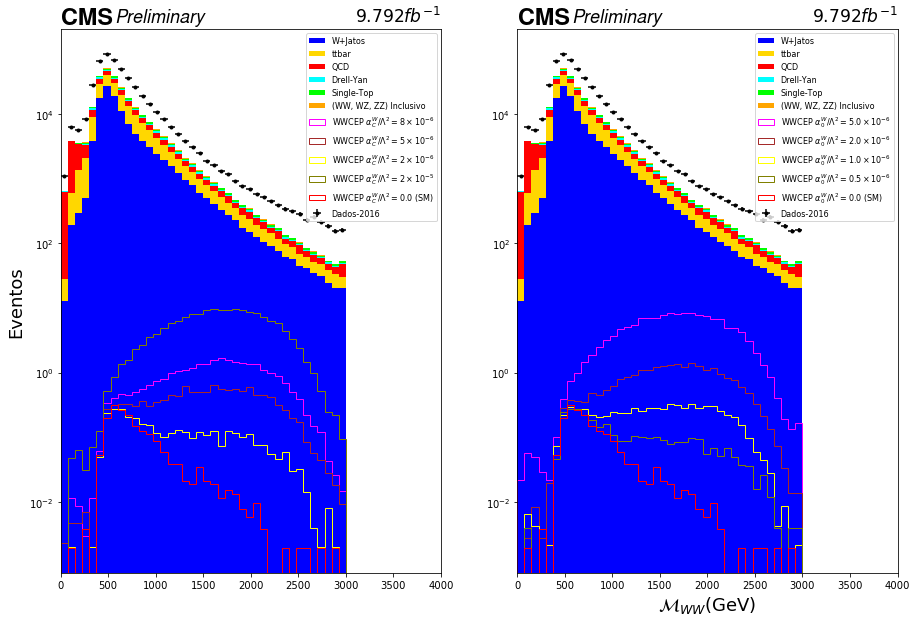

In [40]:
#fazer uma função para montar os plots depois
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )

counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,0] , bins = 40, range = (0,3000) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(0) , bins = 40, range = (0,3000), stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(0) , bins = 40, range = (0,3000), histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=8)
axes[0].set_xlim(0,4000)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(0) , bins = 40, range = (0,3000), stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(0) , bins = 40, range = (0,3000), histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=8)
axes[1].set_xlim(0,4000)
axes[1].set_xlabel(r'$\mathcal{M}_{WW}$(GeV)', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Pt do W leptônico

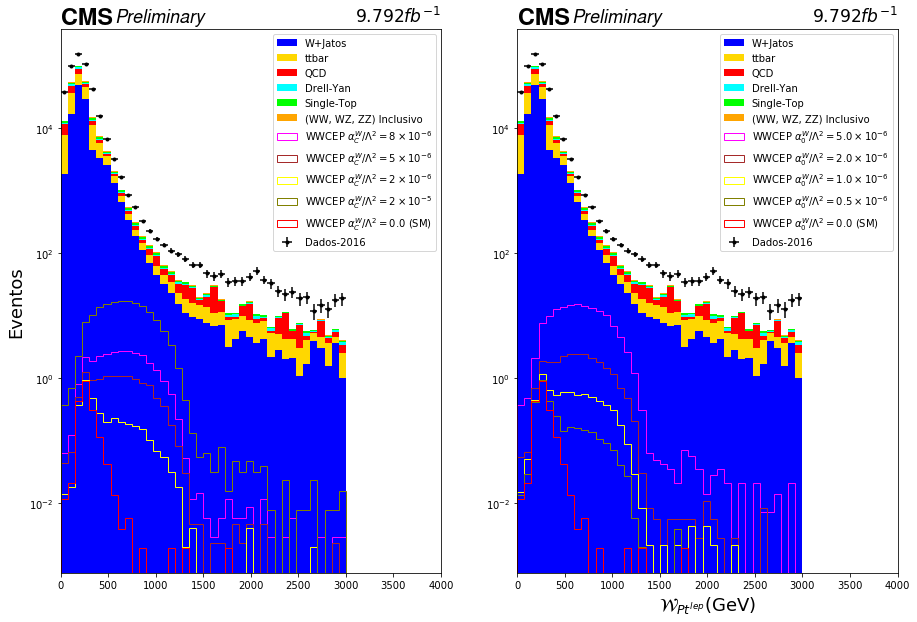

In [41]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )

counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,1] , bins = 40, range = (0,3000) )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(1) , bins = 40, range = (0,3000), stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(1) , bins = 40, range = (0,3000), histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2,fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=10)
axes[0].set_xlim(0,4000)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(1) , bins = 40, range = (0,3000), stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(1) , bins = 40, range = (0,3000), histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=10)
axes[1].set_xlim(0,4000)
axes[1].set_xlabel(r'$\mathcal{W}_{Pt^{lep}}$(GeV)', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Pt do jato

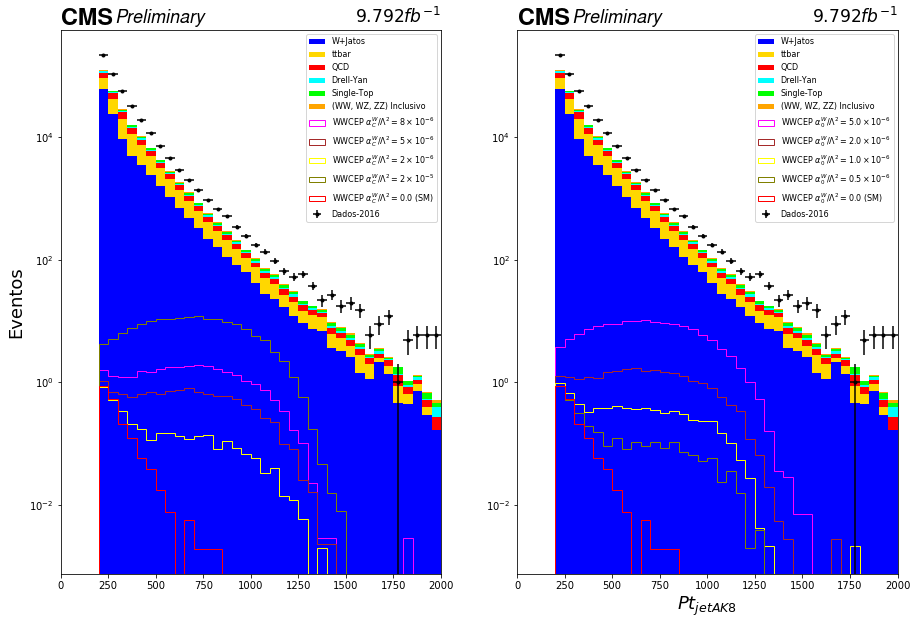

In [42]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,2000) 
var = 4
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,4] , bins = 40, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=8)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=8)
axes[1].set_xlim(range_)
axes[1].set_xlabel('$Pt_{jetAK8}$', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Pruned Mass - Jatos

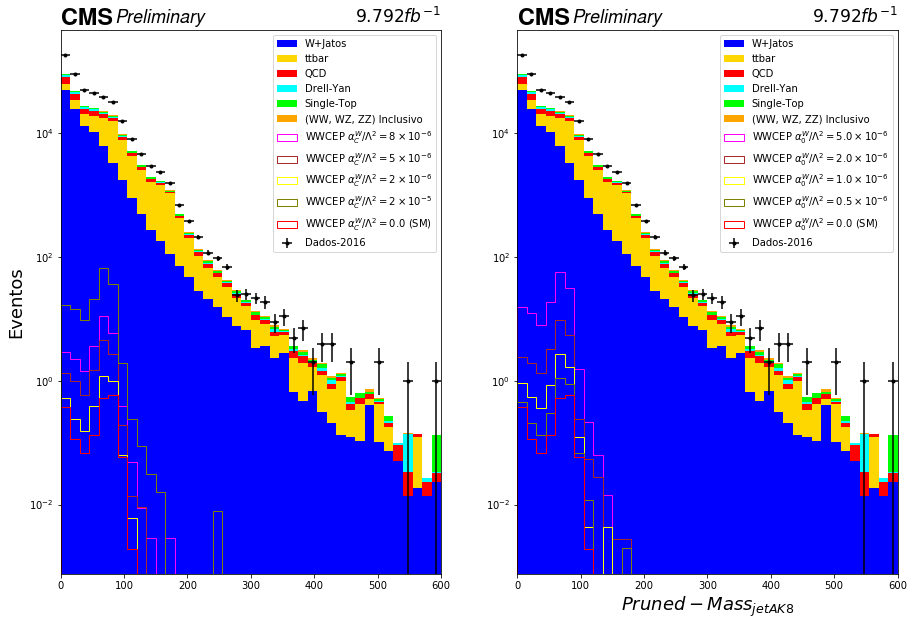

In [43]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,600) 
var = 6
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,var] , bins = 40, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=10)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=10)
axes[1].set_xlim(range_)
axes[1].set_xlabel('$Pruned-Mass_{jetAK8}$', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Jato tau-21

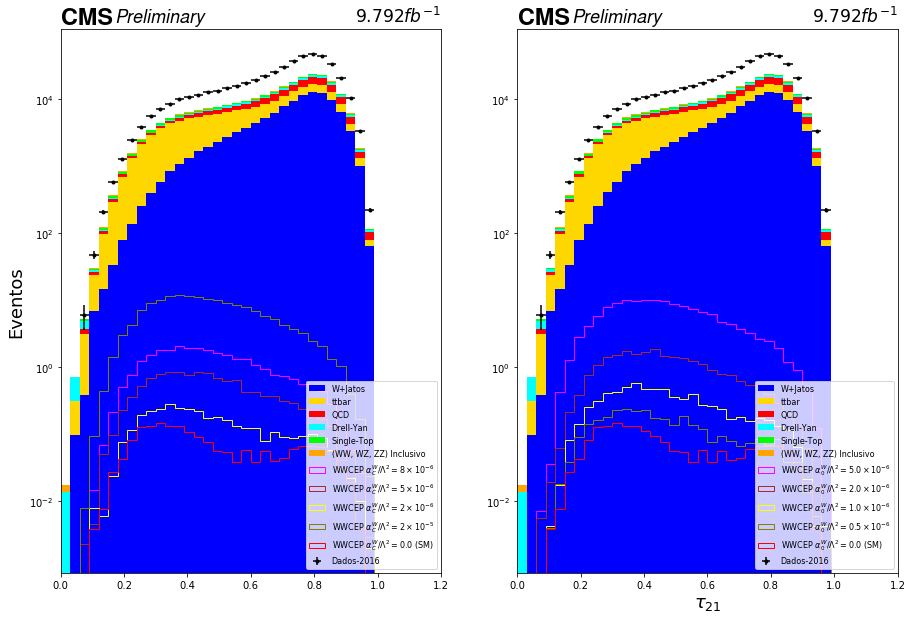

In [44]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,1.2) 
var = 7
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,var] , bins = 40, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=8)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=8)
axes[1].set_xlim(range_)
axes[1].set_xlabel(r'$\tau_{21}$', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Pt-MET

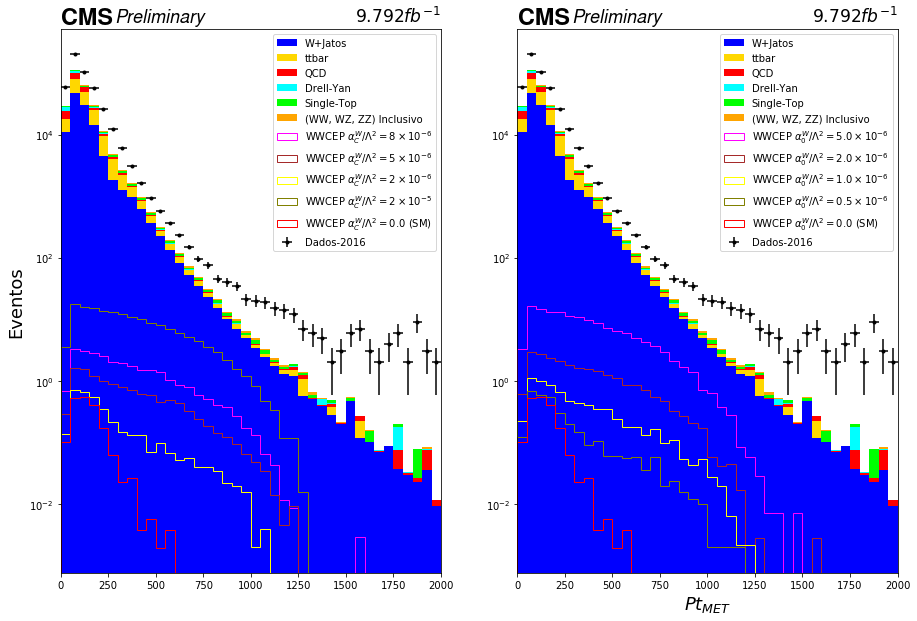

In [45]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,2000) 
var = 8
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,var] , bins = 40, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=10)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=10)
axes[1].set_xlim(range_)
axes[1].set_xlabel('$Pt_{MET}$', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

# Pt do Muon

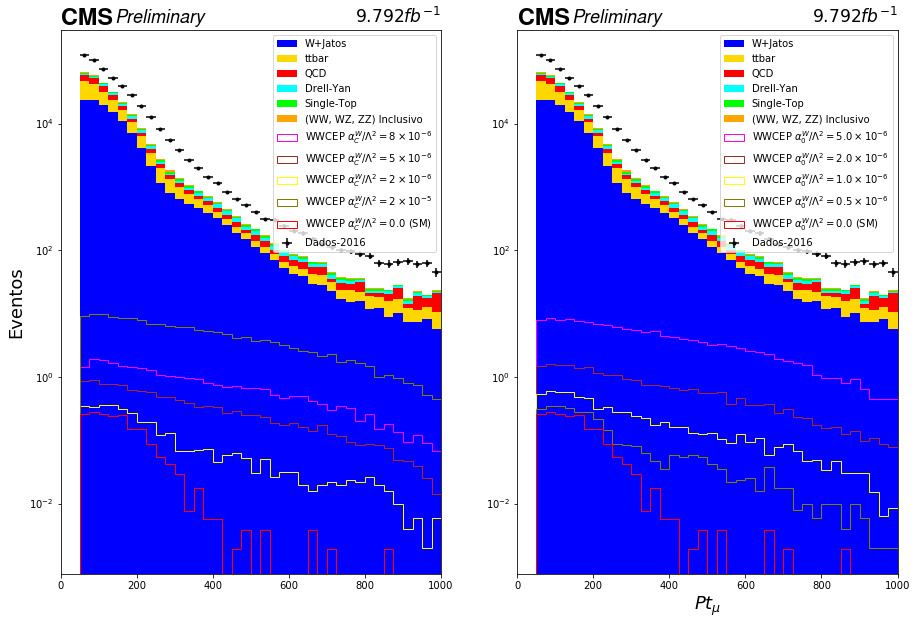

In [46]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,1000) 
var = 9
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,var] , bins = 40, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='best', fontsize=10)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='best', fontsize=10)
axes[1].set_xlim(range_)
axes[1].set_xlabel('$Pt_{\mu}$', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

## Traços Extras 

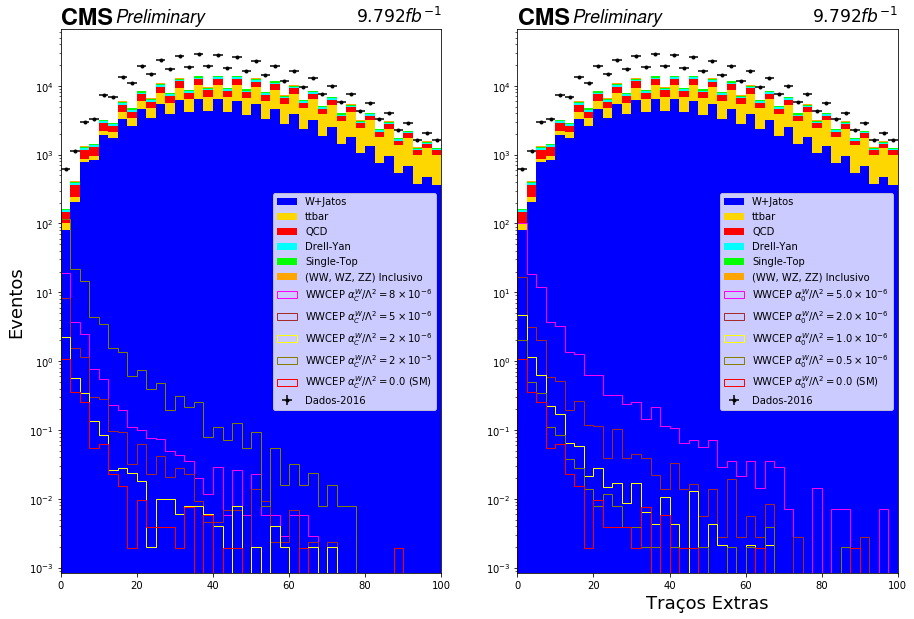

In [47]:
fig, axes = plt.subplots( 1, 2, figsize=(15,10) )
range_ = (0,100) 
var = 11
counts_1, bin_edges_1 = np.histogram( Dadinhos_reais[:,var] , bins = 40, range = range_  )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.

axes[0].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[0].hist( lista_signal_0(var) , bins = 40, range = range_, histtype = 'step', weights = lista_signal_0_norm , label = label_signal_0 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[0].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[0].legend(loc='center right', fontsize=10)
axes[0].set_xlim(range_)
axes[0].set_ylabel('Eventos', fontsize = 18)
axes[0].set_yscale('log')
axes[0] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[0] , fontsize = 18)

axes[1].hist( lista_backgr(var) , bins = 40, range = range_, stacked = True , weights = lista_norm_back , label = label_back , color = ['blue','gold','red','cyan','lime','orange'] )
axes[1].hist( lista_signal_1(var) , bins = 40, range = range_, histtype = 'step' , weights = lista_signal_1_norm , label = label_signal_1 , color = ['red','olive','yellow','brown','fuchsia'] )
axes[1].errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[4] - bin_centres_1[5])/2, fmt='.', label = 'Dados-2016', color = 'black' )
axes[1].legend(loc='center right', fontsize=10)
axes[1].set_xlim(range_)
axes[1].set_xlabel('Traços Extras', fontsize = 18)
axes[1].set_yscale('log')
axes[1] = hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", ax = axes[1] , fontsize = 18)

In [48]:
import sys
sys.exit()

SystemExit: 

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import coffea.hist as hist

In [ ]:
histo_signal = hist.Hist("Eventos",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("Mww", r"$\mathcal{M}_{WW}$(GeV)", 20, 0, 3000),
        hist.Bin("MET", "MET", 20, 0, 1000) 
        )
histo_signal.fill(
    sample = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)',
    Mww = SM[:,0],
    MET = SM[:,8],
    weight = SM[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$',
    Mww = ANOMALO1[:,0],
    MET = ANOMALO1[:,8],
    weight = ANOMALO1[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-6}$',
    Mww = ANOMALO2[:,0],
    MET = ANOMALO2[:,8],
    weight = ANOMALO2[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=5 \times 10^{-6}$',
    Mww = ANOMALO3[:,0],
    MET = ANOMALO3[:,8],
    weight = ANOMALO3[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$',
    Mww = ANOMALO4[:,0],
    MET = ANOMALO4[:,8],
    weight = ANOMALO4[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6} $',
    Mww = ANOMALO5[:,0],
    MET = ANOMALO5[:,8],
    weight = ANOMALO5[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 1.0 \times 10^{-6} $',
    Mww = ANOMALO6[:,0],
    MET = ANOMALO6[:,8],
    weight = ANOMALO6[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $',
    Mww = ANOMALO7[:,0],
    MET = ANOMALO7[:,8],
    weight = ANOMALO7[:,12])
histo_signal.fill(
    sample = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $',
    Mww = ANOMALO8[:,0],
    MET = ANOMALO8[:,8],
    weight = ANOMALO8[:,12])

histo = hist.Hist("Eventos",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("Mww", r"$\mathcal{M}_{WW}$(GeV)", 20, 0, 3000),
        hist.Bin("MET", "MET", 20, 0, 1000) 
        )
histo.fill(
    sample = "W+Jatos",
    Mww = WJets[:,0],
    MET = WJets[:,8],
    weight = WJets[:,12])
    
histo.fill(
    sample = "ttbar",
    Mww = TTbar[:,0],   
    MET = TTbar[:,8],
    weight = TTbar[:,12])
    
histo.fill(
    sample = "QCD",
    Mww = QCD[:,0],  
    MET = QCD[:,8],
    weight = QCD[:,12])
    
histo.fill(
    sample = "Drell-Yan",
    Mww = Drell_Yan[:,0],
    MET = Drell_Yan[:,8],
    weight = Drell_Yan[:,12])
    
histo.fill(
    sample = "Single-Top",
    Mww = single_top[:,0], 
    MET = single_top[:,8],
    weight = single_top[:,12])
    
histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    Mww = VV_inclusivo[:,0],  
    MET = VV_inclusivo[:,8],
    weight =VV_inclusivo[:,12])
    
histo.fill(
    sample = "Data-2016",
    Mww = Dadinhos_reais[:,0],
    MET = Dadinhos_reais[:,8]
        )

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label': 'Stat. Unc.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,10),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

Mww = histo.sum("MET")

hist.plot1d(
    Mww['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    Mww[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)

Mww_signal = histo_signal.sum("MET")

hist.plot1d(
    Mww_signal[notdata],
    overlay='sample',
    stack=False,
    order = [r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)', 
             r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$',
             r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-6}$',
             r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=5 \times 10^{-6}$',
             r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$',
             r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6} $', 
             r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 1.0 \times 10^{-6} $', 
             r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', 
             r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $'],
    line_opts=True,
    fill_opts=fill_opts,
    error_opts=error_opts,
    density = False)


ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, 175000)
ax.set_xlabel(None)
ax.legend(loc="best" ,fontsize = 13 )
#leg = ax.legend()
hep.cms.label(llabel="Preliminary", rlabel="$9.792 fb^{-1}$", fontsize = 14) 

hist.plotratio(
    num=Mww['Data-2016'].sum("sample"),
    denom=Mww[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Ratio')
rax.set_ylim(0,3)